In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Display the transformed DataFrame
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
texts = df['review']
labels = df['sentiment']
# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=max_len)
y = labels

import pickle
# Save the tokenizer
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

In [12]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,MaxPooling1D


#Build a more complex DNN model with LSTM layer
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(LSTM(64, return_sequences=True))  # LSTM layer added
model.add(Flatten())  # Flatten the output of LSTM
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# # Build the model
# model = Sequential()
# model.add(Conv1D(64, 5, activation='relu', input_shape=(max_len, 1)))
# model.add(MaxPooling1D(4))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(4))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

C:\Users\rutuj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6526 - loss: 0.5959 - val_accuracy: 0.8479 - val_loss: 0.3468
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8946 - loss: 0.2693 - val_accuracy: 0.8666 - val_loss: 0.3138
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9530 - loss: 0.1464 - val_accuracy: 0.8675 - val_loss: 0.3462
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9834 - loss: 0.0611 - val_accuracy: 0.8622 - val_loss: 0.4212
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9961 - loss: 0.0213 - val_accuracy: 0.8599 - val_loss: 0.5354
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9989 - loss: 0.0081 - val_accuracy: 0.8569 - val_loss: 0.5963
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8627 - val_loss: 0.6723
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9999 - loss: 0.0014 - 

In [16]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8599 - loss: 0.7063
Test accuracy: 0.8605999946594238


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8599 - loss: 0.7063
Test accuracy: 0.8605999946594238


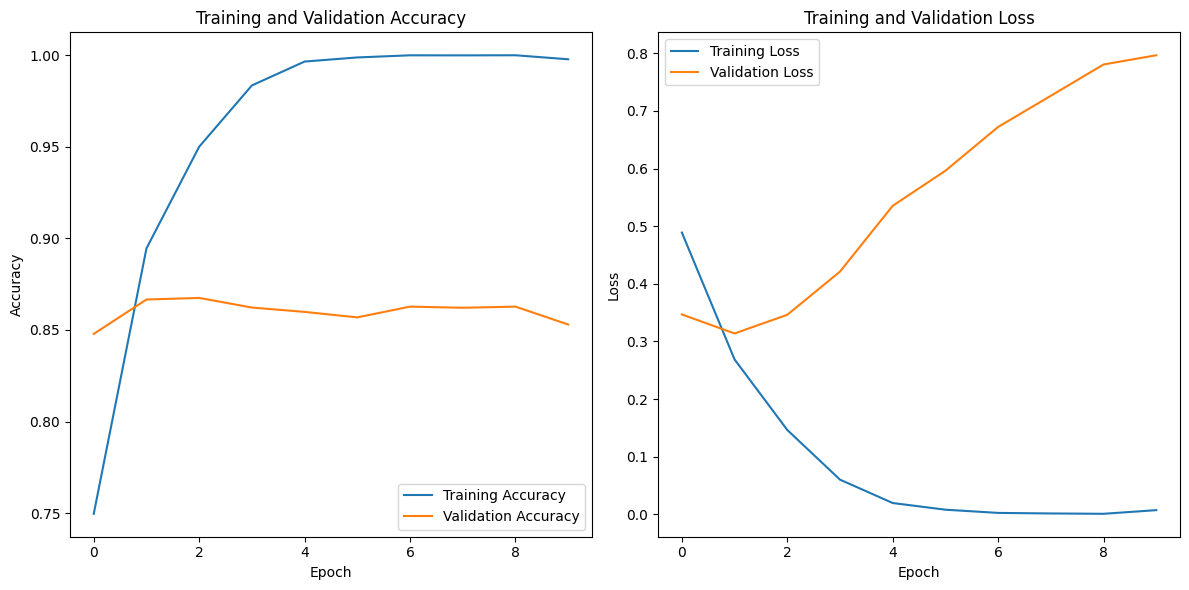

In [17]:
import matplotlib.pyplot as plt
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

In [27]:
def predict_sentiment(user_input):
    # Preprocess the input
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    
    # Make prediction
    prediction = model.predict(padded_sequence)
    
    # Interpret the prediction
    sentiment = "Positive" if prediction[0][0] > 0.6 else "Negative"
    
    return sentiment

# Take user input and predict sentiment
user_review = input("Enter your movie review: ")
result = predict_sentiment(user_review)
print(f"Sentiment: {result}")

Enter your movie review:  movie is best


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Sentiment: Positive


In [28]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

def analyze_sentiment(review):
    # Load the pre-trained Keras model and tokenizer
    model_path = 'C:/Users/Admin/Downloads/movie_review.keras'
    model = load_model(model_path)

    tokenizer_path = 'tokenizer1.pickle'
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)

    max_len = 100
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, max_len)

    # Make prediction
    prediction = model.predict(padded_sequence)

    # Determine sentiment
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction[0][0]

    return sentiment, confidence

if __name__ == "__main__":
    review = input("Enter your review: ")
    sentiment, confidence = analyze_sentiment(review)
    print(f"Prediction: {sentiment} (Confidence: {confidence:.2f})")


Enter your review:  movie is best


ValueError: File not found: filepath=C:/Users/Admin/Downloads/movie_review.keras. Please ensure the file is an accessible `.keras` zip file.